# Machine Learning Model Building

In the following cells, we will analyse the variables of the House Price Dataset from Kaggle. We will take you through the different aspects of the analysis of the variables, and introduce you to the meaning of each of the variables in the dataset as well.

In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [3]:
# load dataset
data = pd.read_csv("https://www.dropbox.com/s/uzg9huvh2jbr3oj/data.csv?dl=1")

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(511, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Real estate dataset contains 511 and 14 columns
The column names we will be analysed to understand what is the meaning:

1. CRIM per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per 10,000
11. PTRATIO pupil-teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT % lower status of the population
14. MEDV Median value of owner-occupied homes in 1000



Data analysis steps:

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: MEDV


# Missing values


variables of the dataset contain missing values

In [201]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values
data[vars_with_na].isnull().mean()

RM    0.009785
dtype: float64

In [202]:
#analyse and make decision about the type of the missing values replaced
data[vars_with_na].describe()

,RM
count,506.000000
mean,6.287589
std,0.703802
min,3.561000
25%,5.885500
50%,6.209000
75%,6.629750
max,8.780000


As we see for the column with missing values we have a small range where the value are exposed. From the experiments downside also we notice that there is normal distribution so the best decision is to fill the missing rows with the mean values.

In [203]:
#replace missing values with mean
data[vars_with_na] = data[vars_with_na].fillna(data.mean())

In [204]:
# check that we have no missing information in the engineered variable
data[vars_with_na].isnull().sum()

RM    0
dtype: int64

# Numerical variables

Find out what numerical variables we have in the dataset

In [205]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Discrete variables


Find which variables are discrete

In [206]:
#a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [207]:
#  visualise the discrete variables

data[discrete_vars].head()

,CHAS,RAD
0,0,1
1,0,2
2,0,2
3,0,3
4,0,3


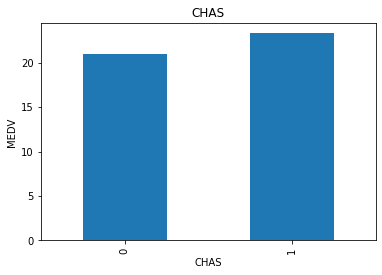

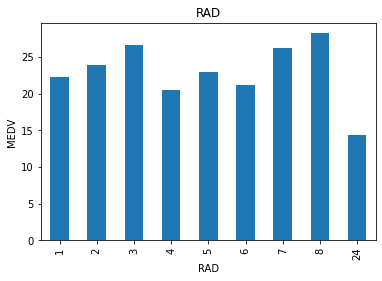

In [208]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['MEDV'].median().plot.bar()
    plt.title(var)
    plt.ylabel('MEDV')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

# Continuous variables


Find the distribution of the continuous variables

In [209]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  12


In [210]:
# visualise the continuous variables

data[cont_vars].head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


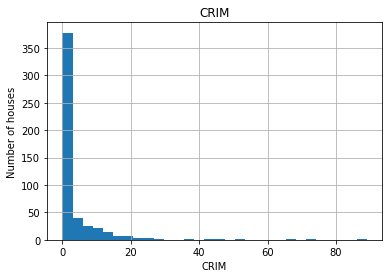

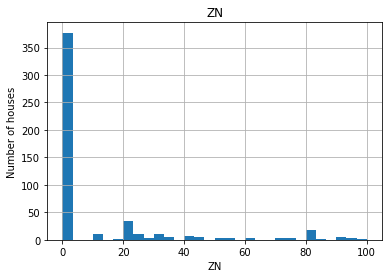

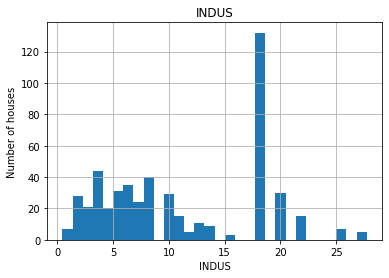

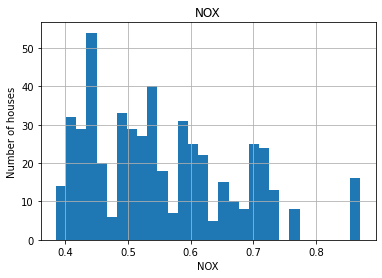

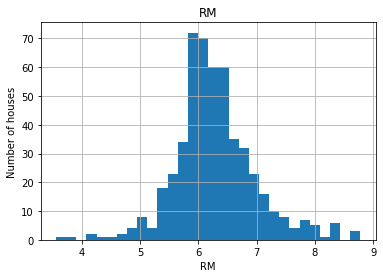

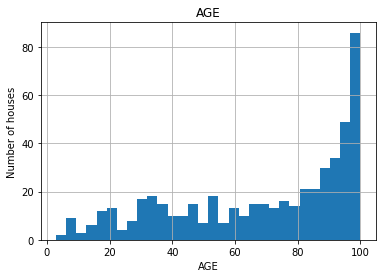

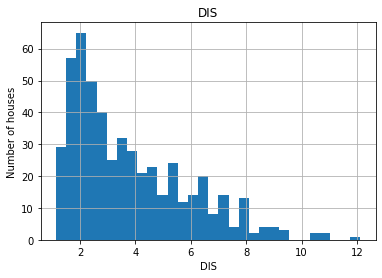

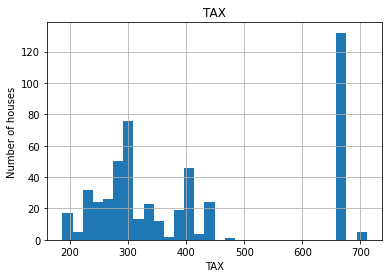

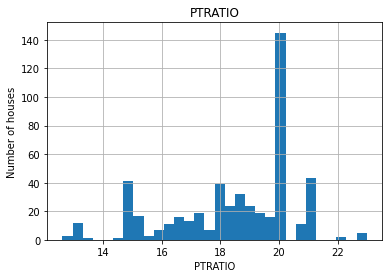

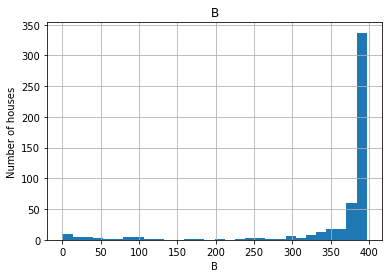

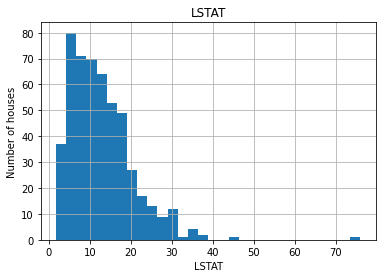

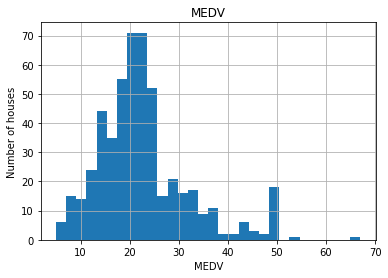

In [211]:
# Analyse the distributions of these variables
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_continuous(data, var)

The variables are not normally distributed, including the target variable 'MEDV'.

Transforming the variables improves the model performance

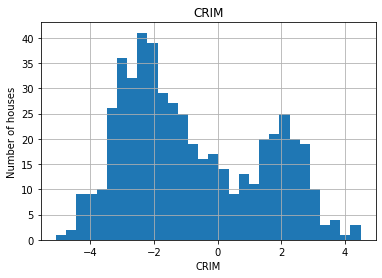

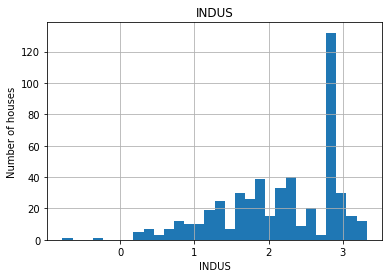

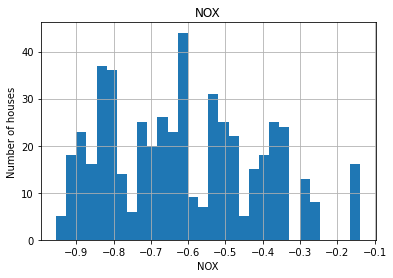

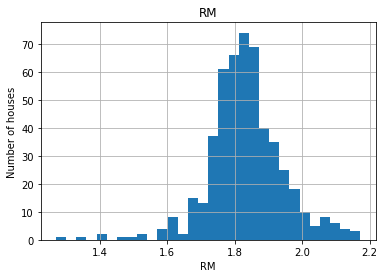

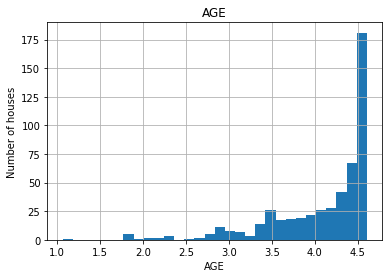

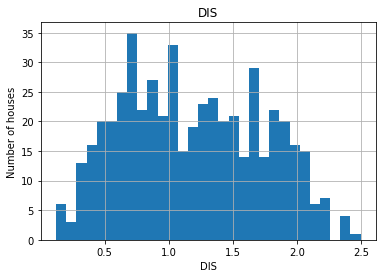

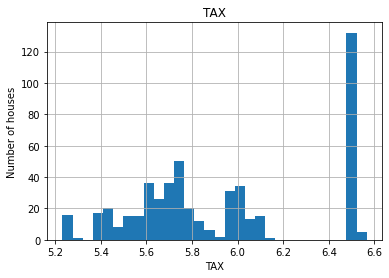

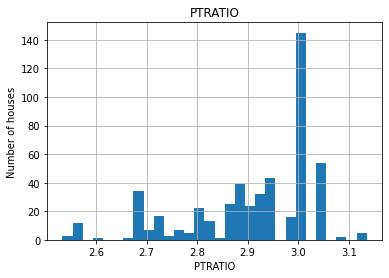

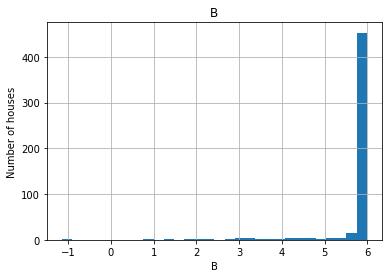

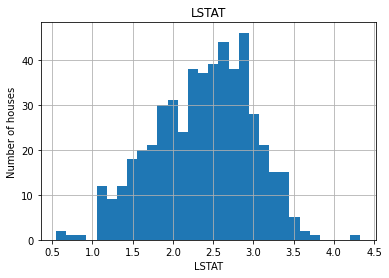

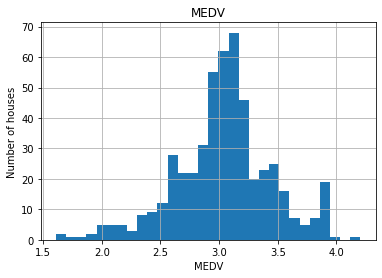

In [212]:
#apply logarithmic transformation
def analyse_transformed_continuous(df, var):
    df = df.copy()

    
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

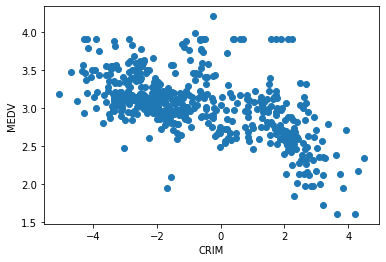

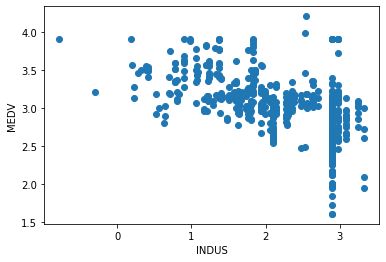

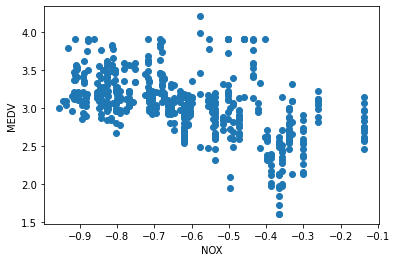

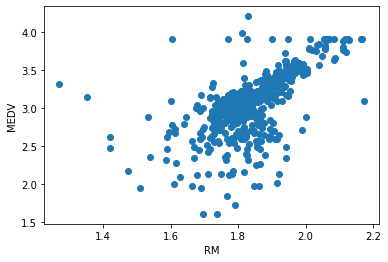

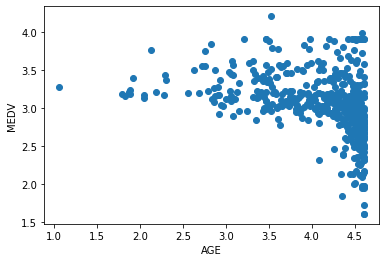

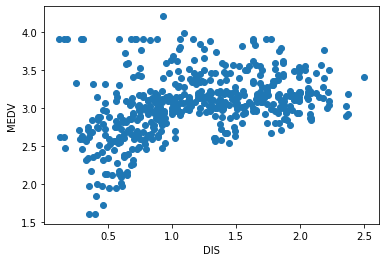

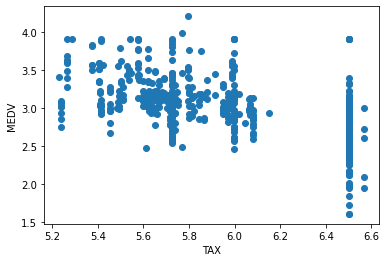

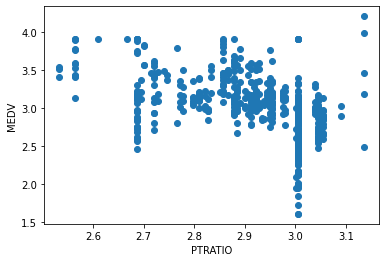

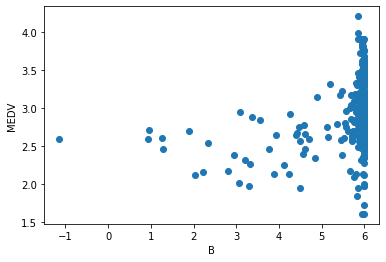

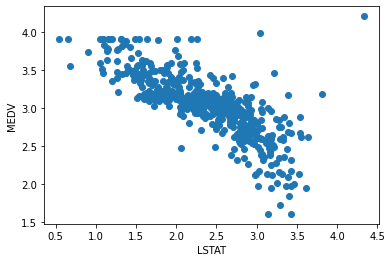

In [213]:
# Explore the relationship between the house price
def transform_analyse_continuous(df, var):
    df = df.copy()

    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        
        # log transform the target (remember it was also skewed)
        df['MEDV'] = np.log(df['MEDV'])
        
        # plot
        plt.scatter(df[var], df['MEDV'])
        plt.ylabel('MEDV')
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != 'MEDV':
        transform_analyse_continuous(data, var)

# Outliers

Extreme values may affect the performance of a linear model

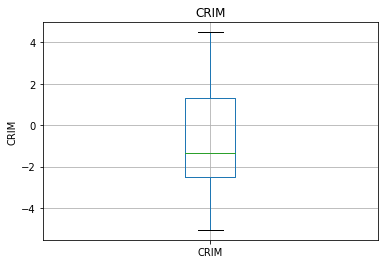

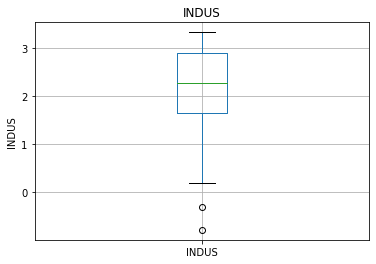

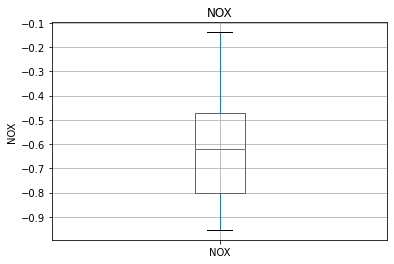

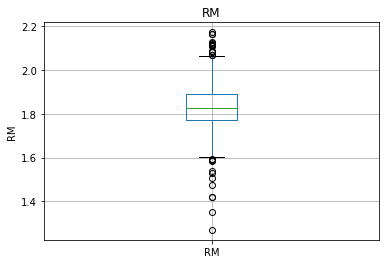

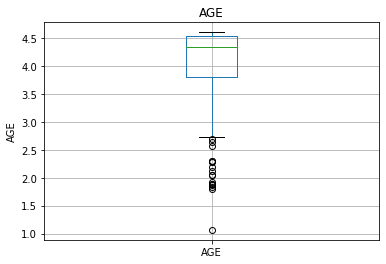

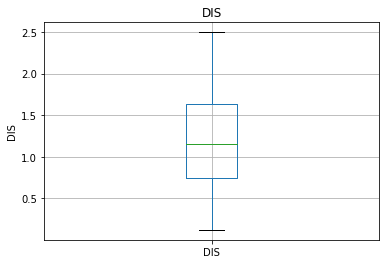

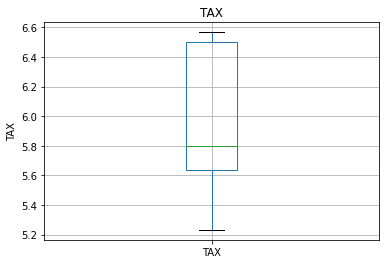

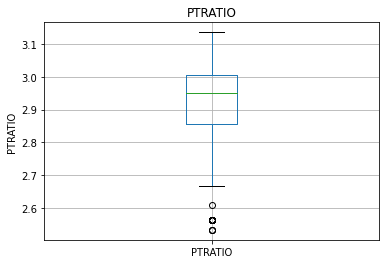

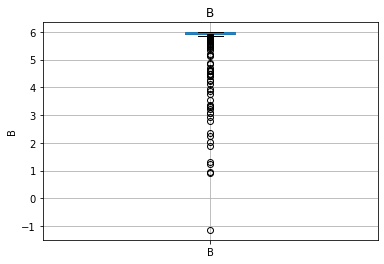

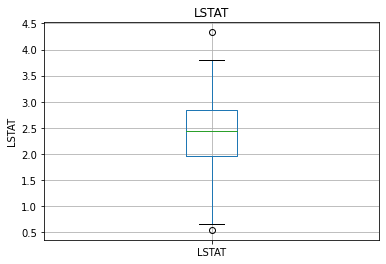

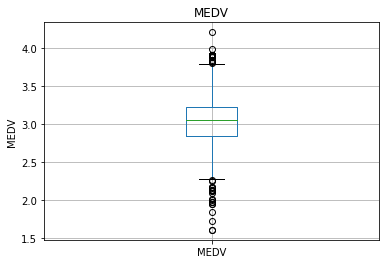

In [214]:
# Create boxplots to visualise outliers in the continuous variables
def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()


for var in cont_vars:
    find_outliers(data, var)

# Separate dataset into train and test

Before beginning to engineer our features, it is important to separate our data intro training and testing set. When we engineer features, some techniques learn parameters from data. It is important to learn this parameters only from the train set. This is to avoid over-fitting.



In [215]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(data,data['MEDV'],test_size=0.2,random_state=0)  

X_train.shape, X_test.shape

((408, 14), (103, 14))

# Feature Scaling

For use in linear models, features need to be either scaled or normalised, scale features to the minimum and maximum values

In [216]:
#capture all variables in a list
#except the target

train_vars = [var for var in X_train.columns if var not in ['MEDV']]

#count number of variables
len(train_vars)

13

In [217]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[train_vars]) 

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

<ipython-input-217-3309bb6a26bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[train_vars] = scaler.transform(X_train[train_vars])
/home/kosicsd/PycharmProjects/MScMachineLearning/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-217-3309bb6a26bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [218]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
485,0.049877,0.0,0.646628,0.0,0.407407,0.527112,0.504634,0.260264,1.000000,0.914122,0.730769,0.979121,0.119160,21.2
310,0.035757,0.0,0.346041,0.0,0.327160,0.270550,0.359423,0.126381,0.130435,0.223282,0.557692,0.882874,0.146896,16.1
297,0.001832,0.0,0.493402,0.0,0.106996,0.427093,0.567456,0.471988,0.130435,0.194656,0.326923,1.000000,0.189982,20.3
71,0.002073,0.0,0.379399,0.0,0.057613,0.459858,0.150360,0.378079,0.130435,0.225191,0.634615,0.949670,0.109735,21.7
170,0.016335,0.0,0.700880,0.0,0.452675,0.443380,0.944387,0.117879,0.173913,0.412214,0.201923,0.736220,0.170998,17.4


# Feature Selection

We will select variables using the Lasso regression: Lasso has the property of setting the coefficient of non-informative variables to zero. This way we can identify those variables and remove them from our model.

In [219]:
# capture the target (remember that the target is log transformed)
y_train = X_train['MEDV']
y_test = X_test['MEDV']

# drop unnecessary variables from our training and testing sets
X_train.drop(['MEDV'], axis=1, inplace=True)
X_test.drop(['MEDV'], axis=1, inplace=True)

/home/kosicsd/PycharmProjects/MScMachineLearning/venv/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Select a subset of the most predictive feature

In [220]:
# We will do the model fitting and feature selection

# first, we specify the Lasso Regression model, and we
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected


#set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [221]:
# let's visualise those features that were selected.
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

As we notice from our experiment upside all features produce important information and have significant efficience when computed the gradient descent to fit the line as linear model. If we increase the alpha the model will select fewer feautures

In [222]:
#set the seed, the random state in this function
sel_2 = SelectFromModel(Lasso(alpha=0.05, random_state=0))

# train Lasso model and select features
sel_2.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [223]:
# let's visualise those features that were selected.
sel_2.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False])

In [224]:
#make a list of the selected features
selected_feats = X_train.columns[(sel_2.get_support())]

In [225]:
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_2.estimator_.coef_ == 0)))

total features: 13
selected features: 11
features with coefficients shrank to zero: 2


In [226]:
# print the selected features
selected_feats

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B'],
      dtype='object')

# Regularised linear regression: Lasso

In [227]:
# set up the models
lin_model_all_features = Lasso(alpha=0.005, random_state=0)
lin_model_selected_features = Lasso(alpha=0.05, random_state=0)

# train the model

lin_model_all_features.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

In [228]:
# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2
# First we will use the model with all features and make the evaluation

#make predictions fro train set
predictions = lin_model_all_features.predict(X_train)

#mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(y_train, predictions))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(y_train,predictions)))))
print('train r2: {}'.format(
    r2_score(y_train, predictions)))
print()

print('Average price: ', int(y_train.median()))


# make predictions for test set
predictions = lin_model_all_features.predict(X_test)

#mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(y_test, predictions))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(y_test, predictions)))))
print('test r2: {}'.format(
    r2_score(y_test, predictions)))
print()

print('Average price: ', int(y_train.median()))

train mse: 33
train rmse: 5
train r2: 0.6288975174911764

Average price:  21
test mse: 38
test rmse: 6
test r2: 0.5854747386720175

Average price:  21


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

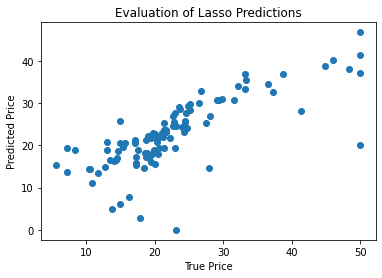

In [229]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model_all_features.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Lasso Predictions')

# Feature importance


Text(0.5, 1.0, 'Feature Importance')

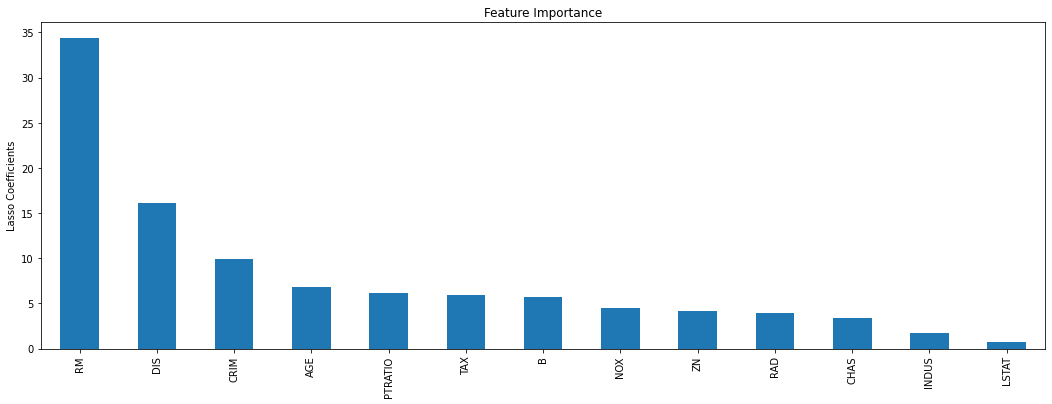

In [230]:
importance = pd.Series(np.abs(lin_model_all_features.coef_.ravel()))
importance.index = train_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

It is noticable that some attributes don't have a lot of efficience in model's fit. So in next experiment we will use bigger alpha and fewer attributes.

In [233]:
# reduce the train and test set to the selected features
X_train = X_train[selected_feats]
X_test = X_test[selected_feats]

# train the model with smaller alpha and fewer attributes

lin_model_selected_features.fit(X_train, y_train)

Lasso(alpha=0.05, random_state=0)

In [234]:
#make predictions fro train set
predictions = lin_model_selected_features.predict(X_train)

#mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(y_train, predictions))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(y_train,predictions)))))
print('train r2: {}'.format(
    r2_score(y_train, predictions)))
print()

print('Average price: ', int(y_train.median()))


# make predictions for test set
predictions = lin_model_selected_features.predict(X_test)

#mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(y_test, predictions))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(y_test, predictions)))))
print('test r2: {}'.format(
    r2_score(y_test, predictions)))
print()

print('Average price: ', int(y_train.median()))

train mse: 34
train rmse: 5
train r2: 0.6114703157991449

Average price:  21
test mse: 41
test rmse: 6
test r2: 0.5510700059398252

Average price:  21


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

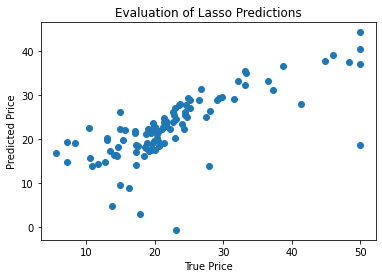

In [235]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model_selected_features.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Lasso Predictions')

Text(0.5, 1.0, 'Feature Importance')

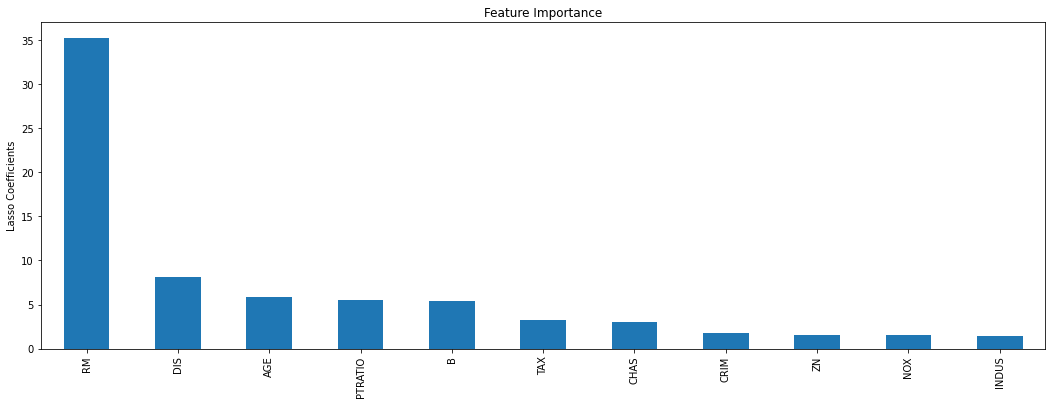

In [237]:
importance = pd.Series(np.abs(lin_model_selected_features.coef_.ravel()))
importance.index = selected_feats
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')